In [1]:
from fbprophet import Prophet
import fbprophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [3]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
for c in avocado.columns:
    if avocado[c].dtype=='float64':
        avocado[c] = avocado[c].astype('float16')
    if avocado[c].dtype=='int64':
        avocado[c] = avocado[c].astype('int16')

In [7]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int16  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float16
 3   Total Volume  18249 non-null  float16
 4   4046          18249 non-null  float16
 5   4225          18249 non-null  float16
 6   4770          18249 non-null  float16
 7   Total Bags    18249 non-null  float16
 8   Small Bags    18249 non-null  float16
 9   Large Bags    18249 non-null  float16
 10  XLarge Bags   18249 non-null  float16
 11  type          18249 non-null  object 
 12  year          18249 non-null  int16  
 13  region        18249 non-null  object 
dtypes: float16(9), int16(2), object(3)
memory usage: 819.9+ KB


In [8]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
avocado.sort_values('Date',inplace=True)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.750000,27360.0,9304.000000,3844.0,615.5,13600.00,13064.000,537.500,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.490234,17728.0,1189.000000,15632.0,0.0,905.50,905.500,0.000,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.679688,2896.0,161.625000,207.0,0.0,2528.00,2528.000,0.000,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.519531,54944.0,3014.000000,35456.0,1562.0,14928.00,11264.000,3660.000,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.639648,1505.0,1.269531,1130.0,0.0,374.25,186.625,187.625,0.0,organic,2015,Boise


In [10]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.360352,inf,inf,inf,inf,inf,inf,22464.000,1363.0,conventional,2018,Chicago
9018,0,2018-03-25,0.700195,inf,inf,inf,30128.0,inf,inf,inf,inf,conventional,2018,SouthCentral
18141,0,2018-03-25,1.419922,inf,29248.0,5080.0,0.0,inf,inf,20112.000,0.0,organic,2018,SouthCentral
17673,0,2018-03-25,1.700195,inf,29648.0,inf,0.0,inf,inf,207.125,0.0,organic,2018,California
8814,0,2018-03-25,1.339844,inf,63904.0,inf,843.5,inf,inf,23840.000,2906.0,conventional,2018,NewYork


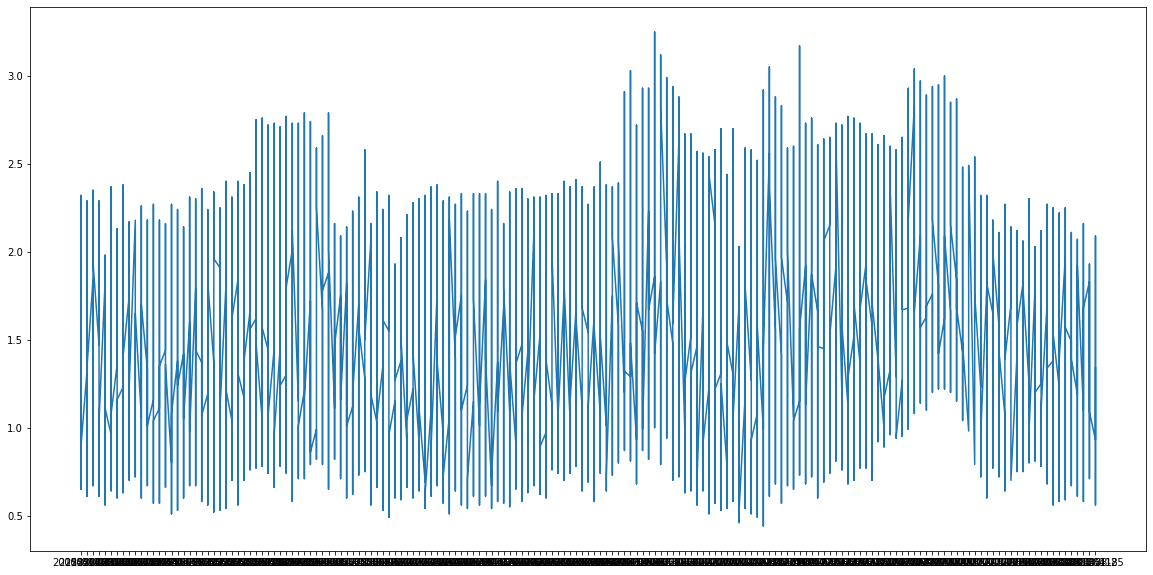

In [11]:
plt.figure(figsize=(20,10))
plt.plot(avocado.Date,avocado.AveragePrice)
plt.show()

<AxesSubplot:xlabel='AveragePrice'>

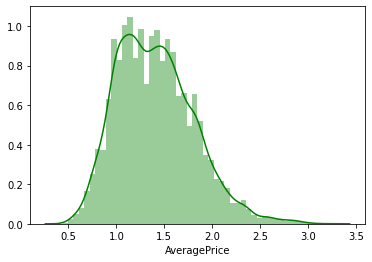

In [12]:
#plot distribution of average price
sns.distplot(avocado.AveragePrice,color='green')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

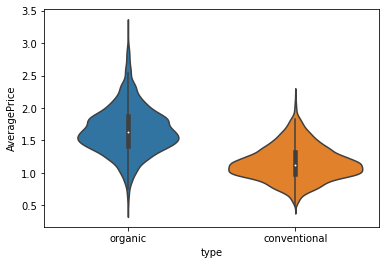

In [13]:
sns.violinplot(x='type',y='AveragePrice',data=avocado)

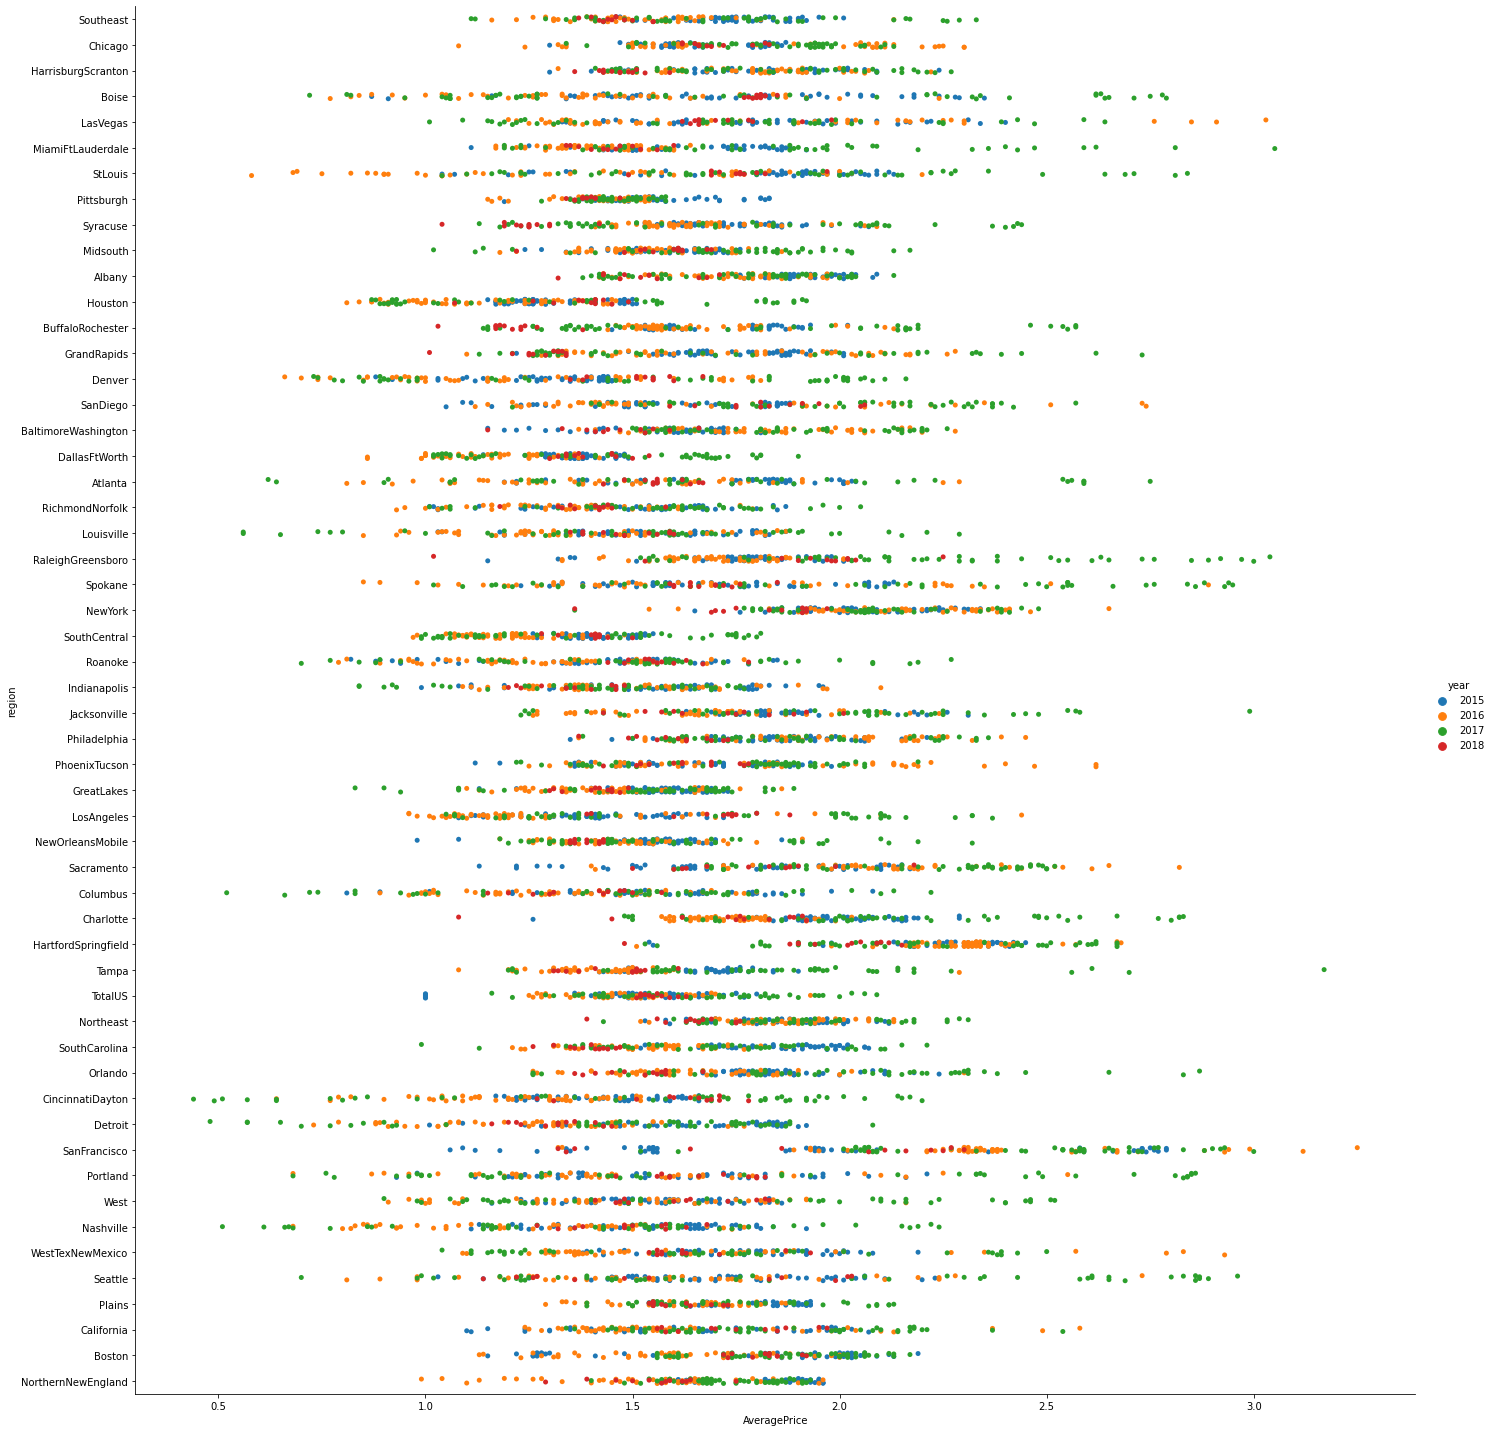

In [14]:
sns.catplot(y='region',
            x='AveragePrice',
            data=avocado[avocado.type=='organic'],
           hue='year',
           height=20)

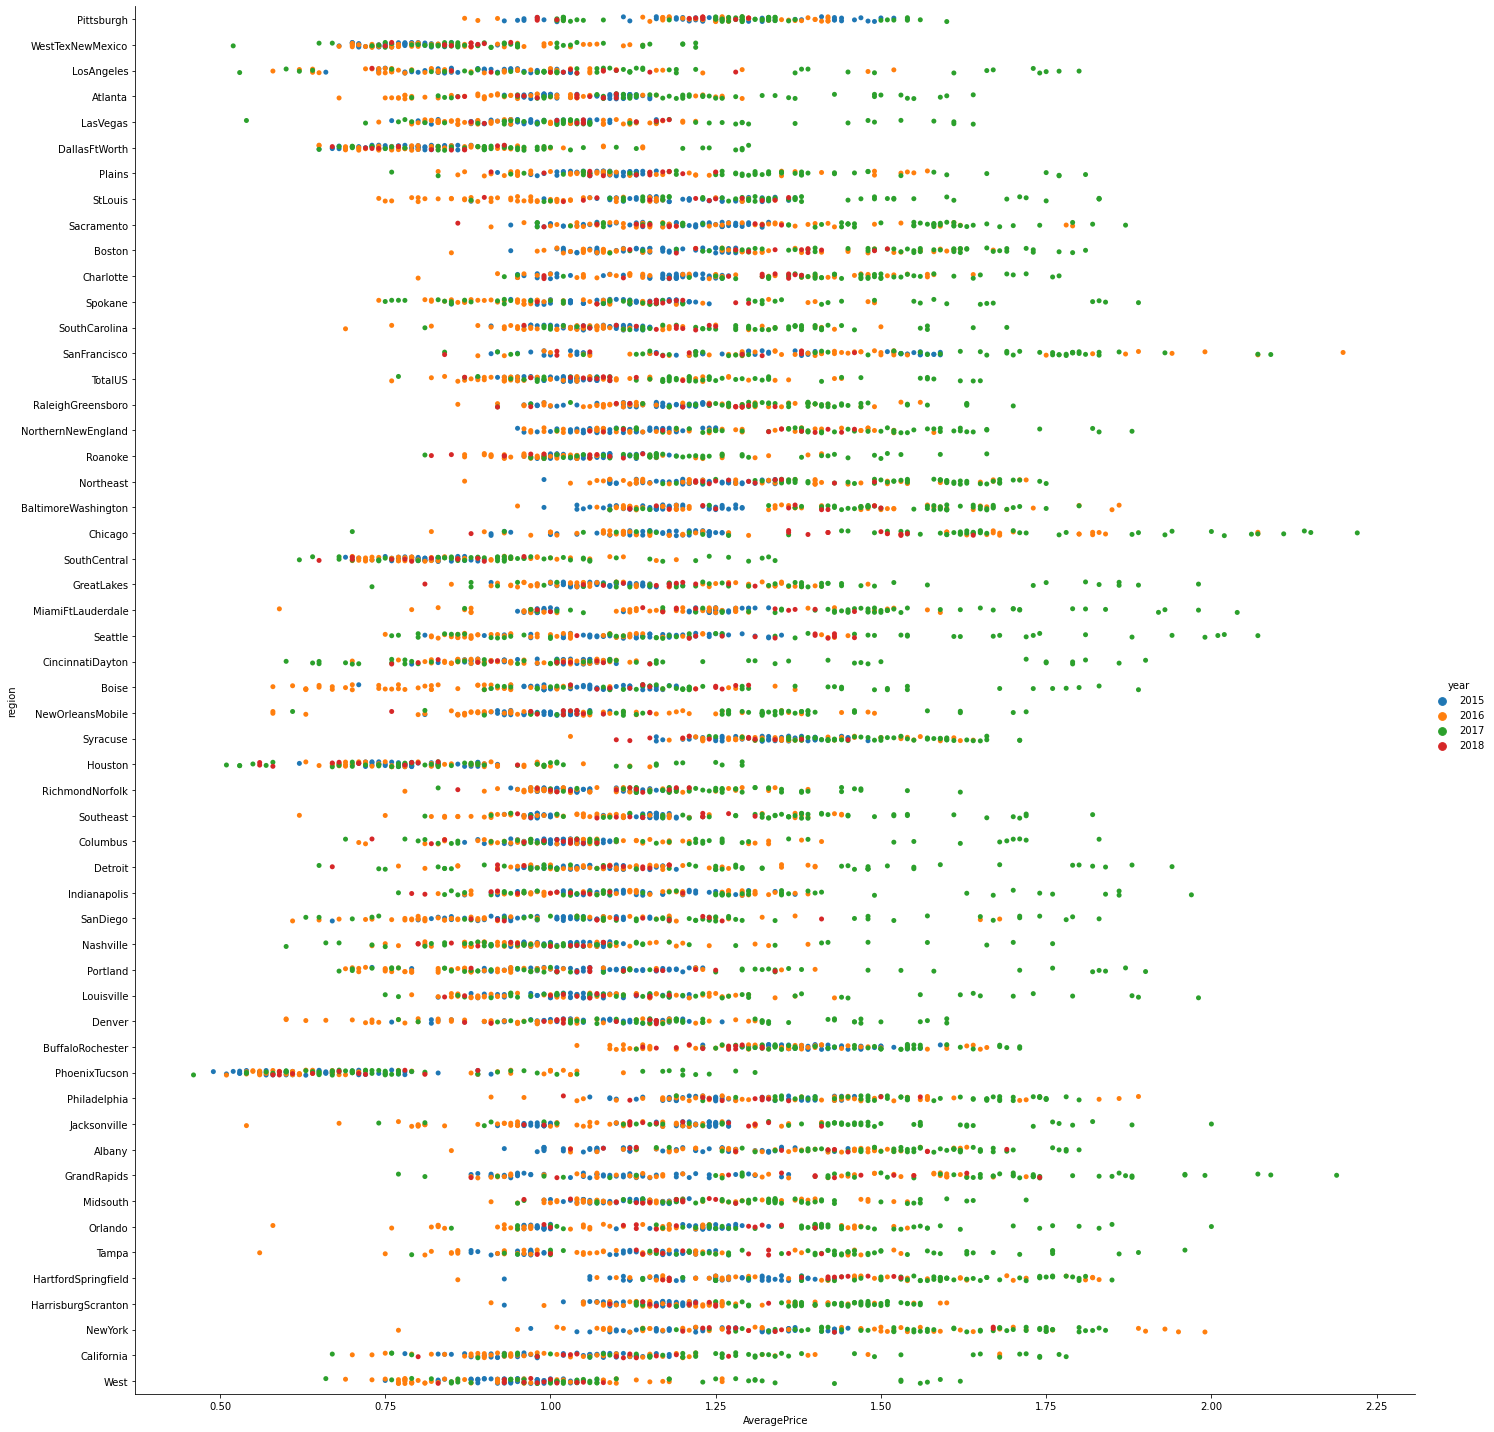

In [15]:
sns.catplot(y='region',
            x='AveragePrice',
            data=avocado[avocado.type=='conventional'],
           hue='year',
           height=20)

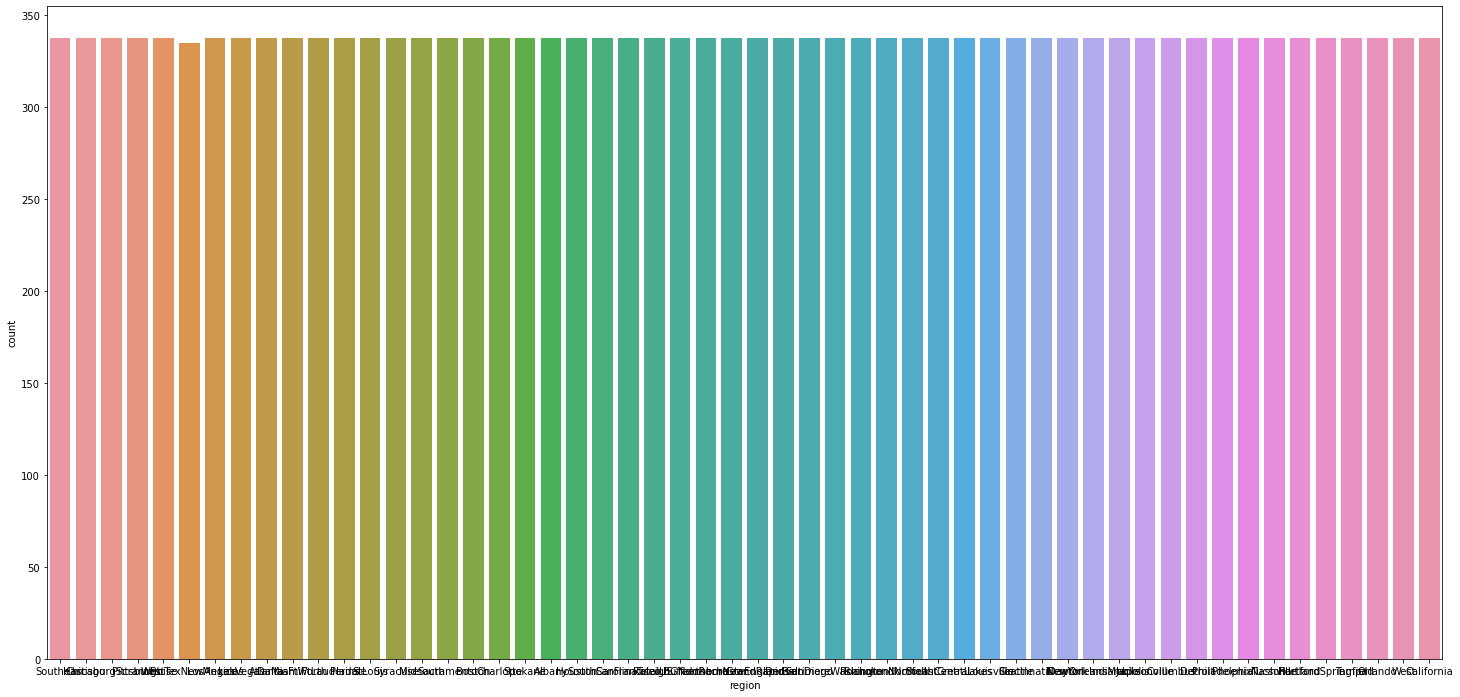

In [16]:
#bar chart using sns.countplot
plt.figure(figsize=(25,12))
sns.countplot(x='region',data=avocado)
plt.show()

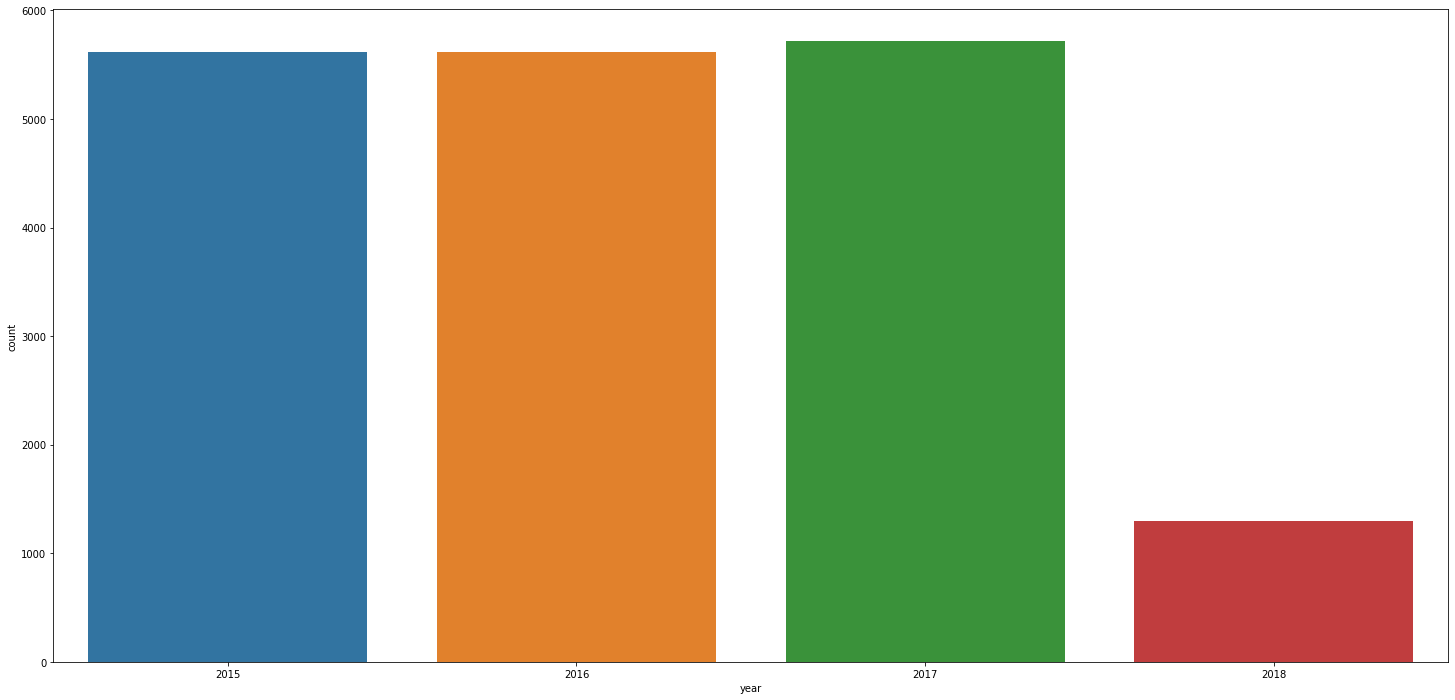

In [17]:
plt.figure(figsize=(25,12))
sns.countplot(x='year',data=avocado)
plt.show()

In [18]:
#prepare the data for facebook prophet
#facebook prophet takes 'ds' as input, 'y' as output
df = avocado[['Date','AveragePrice']]
df.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)
df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
11569,2015-01-04,1.750000
9593,2015-01-04,1.490234
10009,2015-01-04,1.679688
1819,2015-01-04,1.519531
9333,2015-01-04,1.639648


In [20]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500274,0.899604,1.838710,1.500274,1.500274,-0.117097,-0.117097,-0.117097,-0.117097,-0.117097,-0.117097,0.0,0.0,0.0,1.383177
1,2015-01-11,1.494949,0.918207,1.848420,1.494949,1.494949,-0.108546,-0.108546,-0.108546,-0.108546,-0.108546,-0.108546,0.0,0.0,0.0,1.386404
2,2015-01-18,1.489624,0.857204,1.850435,1.489624,1.489624,-0.108023,-0.108023,-0.108023,-0.108023,-0.108023,-0.108023,0.0,0.0,0.0,1.381601
3,2015-01-25,1.484299,0.845546,1.852832,1.484299,1.484299,-0.126655,-0.126655,-0.126655,-0.126655,-0.126655,-0.126655,0.0,0.0,0.0,1.357644
4,2015-02-01,1.478974,0.871167,1.803754,1.478974,1.478974,-0.154542,-0.154542,-0.154542,-0.154542,-0.154542,-0.154542,0.0,0.0,0.0,1.324432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.158428,0.553120,1.614184,0.962495,1.353883,-0.085414,-0.085414,-0.085414,-0.085414,-0.085414,-0.085414,0.0,0.0,0.0,1.073014
530,2019-03-22,1.157685,0.582903,1.629629,0.960590,1.354325,-0.083640,-0.083640,-0.083640,-0.083640,-0.083640,-0.083640,0.0,0.0,0.0,1.074045
531,2019-03-23,1.156941,0.541493,1.614002,0.958920,1.353789,-0.081590,-0.081590,-0.081590,-0.081590,-0.081590,-0.081590,0.0,0.0,0.0,1.075351
532,2019-03-24,1.156198,0.538591,1.572344,0.957373,1.353290,-0.079283,-0.079283,-0.079283,-0.079283,-0.079283,-0.079283,0.0,0.0,0.0,1.076915


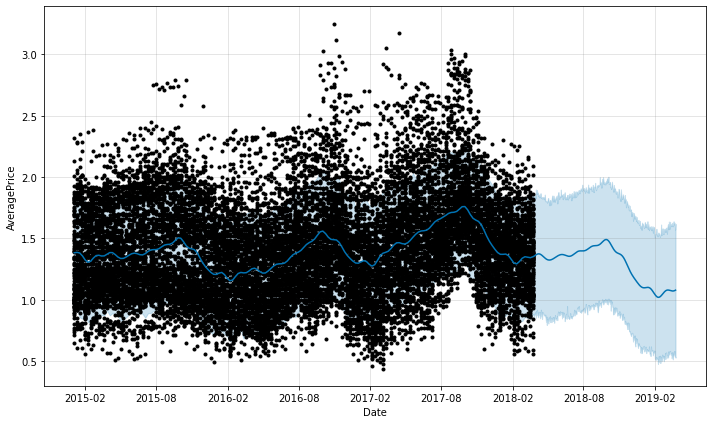

In [22]:
figure = model.plot(forecast,xlabel='Date',ylabel='AveragePrice')

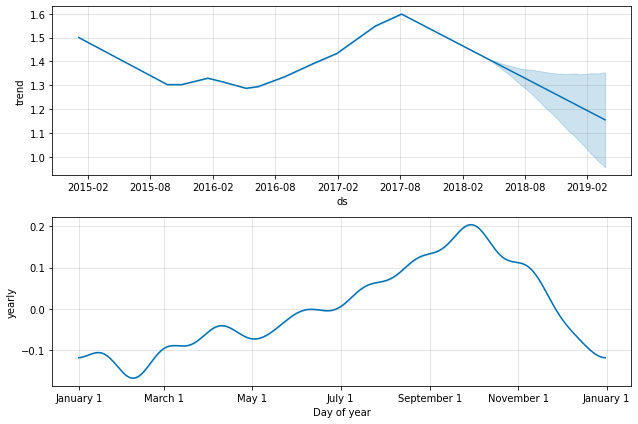

In [23]:
figure2 = model.plot_components(forecast)